<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/G1LAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 04 Ordinaria

## LAB 04 EJ11:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler


Empezaremos por cargar nuestro csv:

In [ ]:
drive.mount('/content/drive')

#Abrimos nuestro csv a través de Google Drive
data_path = '/content/drive/My Drive/wine_alcohol.csv'

wine_data = pd.read_csv(data_path, delimiter=';')

#Imprimimos las primeras filas
print(wine_data.head())

Mounted at /content/drive
   id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68  

Revisión de los datos:
Seguimos con la revisión de los tipos de datos y las características generales de las columnas.

In [ ]:
#Mostramos información de las columnas
wine_data.info()
#Describimos el conjunto de datos
wine_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,5.818378,1.753886,10.491801
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,0.873255,0.430779,1.192712
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000,1.000000,8.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000,2.000000,9.500000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000,2.000000,10.300000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000,2.000000,11.300000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,9.000000,2.000000,14.900000


1.1)
Continuaremos con la limpieza, abordando cualquier valor nulo y eliminando las columnas innecesarias.

In [ ]:
#Verificamos valores nulos
null_counts = wine_data.isnull().sum()
print(null_counts)

#Eliminamos columna 'id' ya que no es relevante para entrenar el modelo
wine_data = wine_data.drop(columns=['id'])


id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64


In [ ]:
valores_distintos_1 = wine_data['quality'].unique()
valores_distintos_2 = wine_data['wine type'].unique()

#Imprimimos los valores únicos
print(valores_distintos_1)
print(valores_distintos_2)

[5 6 7 4 8 3 9]
[1 2]


1.2) Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones que existen entre ellas.

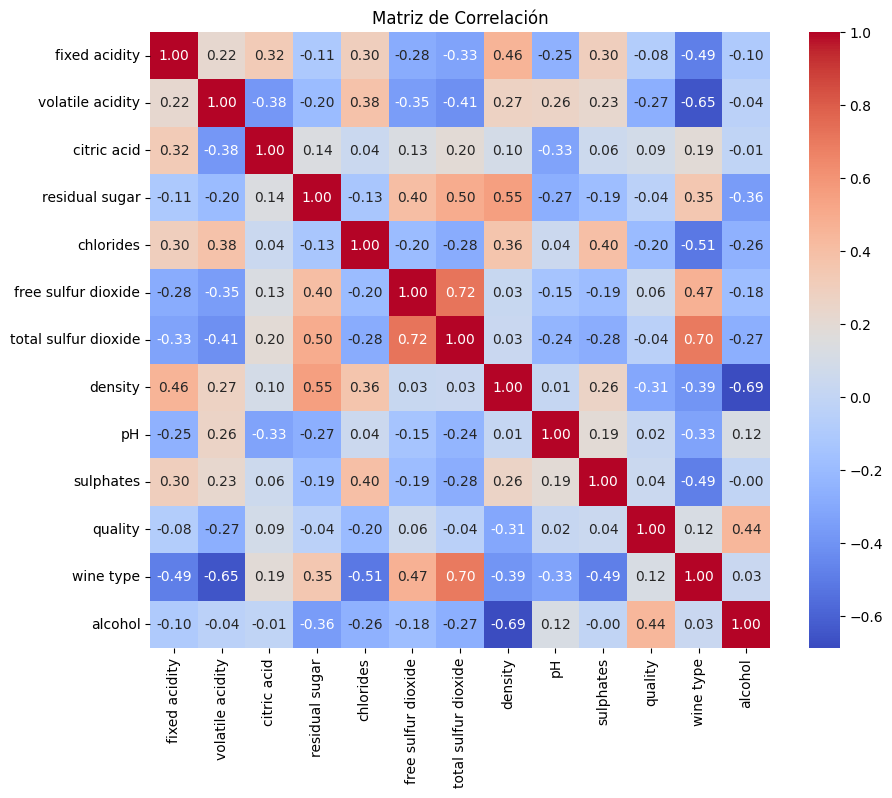

In [ ]:
#Calculamos la matriz de correlación
correlation_matrix = wine_data.corr()

#Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
plt.title('Matriz de Correlación')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Parece que los atributos que más relación guardan con el atributo objetivo (alcohol) son density (-0.69) y quality (0.44).
La densidad es inversamente proporcional al alcohol que tenga el vino y la calidad es proporcional.

1.3 y 1.4) Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables seleccionadas en el punto anterior. Calcular el error en el modelo obtenidos en el punto anterior.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Separamos los datos en características (X) y la variable objetivo (y)
#Hemos elegido density como variable explicativa
X = wine_data[['density']]
y = wine_data['alcohol']

#Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Inicializamos el modelo de regresión lineal
model = LinearRegression()

#Entrenamos el modelo
model.fit(X_train, y_train)

#Predecimos los valores de la variable objetivo en el conjunto de test
y_pred = model.predict(X_test)

#Calculamos el error cuadrático medio y el R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)


Error Cuadrático Medio (MSE): 0.7343806232904048
Coeficiente de Determinación (R²): 0.4878679434546198


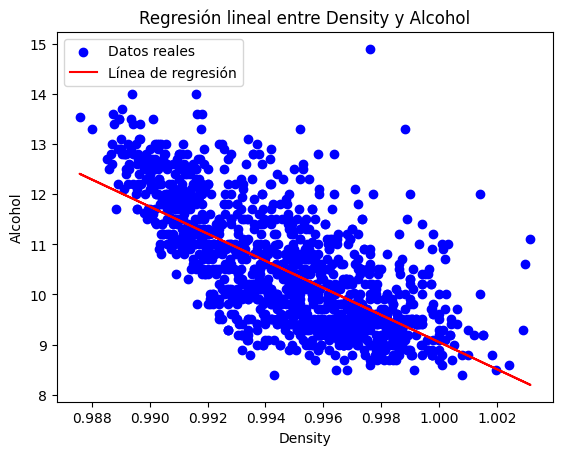

In [ ]:
plt.scatter(X_test, y_test, color = 'blue', label = 'Datos reales')
plt.plot(X_test, y_pred, color = 'red', label = 'Línea de regresión')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title(f'Regresión lineal entre Density y Alcohol')
plt.legend()
plt.show()

El gráfico mustra la relación negativa que hay entre la densidad y el nivel de alcohol, lo cual es coherente con las características físicas de los líquidos ya que el alcohol es menos denso que el agua.

Vemos que el modelo de regresión simple con la variable respuesta alcohol y única variable explicativa density tiene un error del 73% y un R^2 de 0.48, lo cuál no está mal teniendo en cuenta que solo estamos tomando la información de una sola variable, density. Aun así, si se eligen más variables que estén relacionadas con la variable alcohol, nuestros resultados mejorarán, como veremos más adelante.

# LAB 04 EJ 2


Buscamos seleccionar las variables idóneas para solucionar el problema de regresión múltiple. Gracias a la matriz de correlación que hemos creado al inicio, podremos elegir con buen criterio las variables de la regresión lineal múltiple ya que cuanto más correlación haya entre las variable respuesta y las que escojamos en nuestro modelo mayor será el porcentaje explicado de nuestro modelo para la precisión o lo que es lo mismo; si cogemos las variables con una mayor correlación con la variable respuesta nuestras predicciones tendrán menos error.

Vemos en el enunciado que la selección de variables debe de ser como mínimo de 4 variables. Es decir que mínimo deberemos de tener 4 valores X y 4 coeficientes de regresión asociados a ellos. Por lo que si escojemos los que en la matriz de correlación son los 4 valores más correlacionados de nuestro modelo obtendremos que debemos de escoger:

->Quality

-> Density

->Total sulfur dioxide

-> Residual sugar

Sin embargo, este criterio consideramos que no es el mejor ya que cuando seleccionamos una variable y la insertamos en nuestro modelo estamos considerando que esta variable es significativa. Es decir, que hay relación suficiente como para que el coeficiente de regresión lineal que acompaña a esta variable sea distinto de 0 o lo que es lo mismo que si el resto de variables quedan constantes hay un cambio de más de 0 unidades en el grado de alcohol por lo que debería de ser introducida al modelo.

Sabiendo esto, es lógico que ahora podamos decir que seleccionar 4 variables para predecir la variable respuesta no es el mejor acierto, ya que si seleccionamos el valor de -0.27 de total sulfur dioxide creemos que es lógico considerar también significativo el -0.26 del valor chlorides.

Intuimos que quality es una variable categórica así que lo primero que haremos será comprobarlo

In [ ]:
print(wine_data['quality'].unique())

[5 6 7 4 8 3 9]


Efectivamente, observamos que esta variable es categórica por lo que exige un tratamiento distinto al resto de variables para la regresión lineal.

Para tratar con este tipo de datos en la regresión lineal se usa una derivación del concepto de variable binaria o dummy.

Básicamente este concepto se utiliza en variables categóricas que solo tienen 2 salidas es decir éxito o fracaso. Un claro ejemplo sería en el caso del sexo donde tendríamos hombre o mujer. Que es lo mismo que hombre y no hombre.

De esta forma lo que sucede es que cuando una variable es binaria la entrada es 0 ó 1 únicamente, consiguiendo así que el coeficiente beta sea la variación en la salida dejando el resto constante en caso de éxito. De tal forma que si seguimos con el ejemplo anterior y buscasemos como variable respuesta el salario, el coeficiente beta que acompaña a la variable binaria hombre, sería la diferencia salarial existente entre los hombres y las mujeres únicamente por el hecho de ser hombres.

Teniendo clara lo que es una variable dummy podemos saber que estamos haciendo en el código po el hecho de habernos encontrado una variable categórica en nuestro dataset. Básicamente lo que estamos realizando es; generamos una columna por cada uno de los valores categóricos de nuestro dataset, es decir por ejemplo 'quality_3' que solo tendrá un 1 en caso de que la quality sea igual a 3 por lo que activará su coeficiente y el resto serán 0. De esta forma, hemos obtenido una mayor precisión en nuestro modelo ya que habrá un coeficiente distinto para cada variable.

In [ ]:
# Utilizamos get_dummies para convertir 'quality' en variables dummy
wine_data_dummies = pd.get_dummies(wine_data, columns=['quality'], prefix='quality')

Finalmente, seleccionamos los datos y realizamos la partición train test

In [ ]:
# Dividir el dataset en características (X) y la variable objetivo (y)
X = wine_data_dummies[['quality_3', 'quality_4', 'quality_5','quality_6', 'quality_7','quality_8', 'quality_9', 'density', 'residual sugar', 'total sulfur dioxide', 'chlorides']]
y = wine_data_dummies['alcohol']

# División en conjuntos de entrenamiento y test (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## CREACION DEL MODELO

A continuación nos disponemos a crear el modelo de regresión lineal. Para ello básicamente meteremos dentro del train una constante. Esta constante va a ser el intercepto de nuestro modelo que representa aquello que las variables de nuestro modelo no son capaces de recoger pero que sin embargo si que influyen en nustro modelo de regresión lineal. A continuación, se pasará a tipo float todos los datos para un correcto trabajo de nuestro modelo y se entrenará el modelo con los datos de train.

In [ ]:
#AGREGAR CONSTANTE
X_train_sm = sm.add_constant(X_train)
#CONVERTIR LOS DATOS A NUMERICO
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)
# Crear el modelo y ajustarlo
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()

## EVALUACION DEL MODELO

A continuación, el seiguiente paso será evaluar el modelo tanto en el entrenamiento como en el test. Para ello tomaremos en cuenta los siguientes valores:


1.   MSE (Error Cuadrático Medio): Es la media del cuadrado de la diferencia de los valores observados con los valores predichos. Cuanto más bajo sea este valor, mejor será el modelo
2.   MAE(Error Medio Absoluto): Es la media de las diferencias absolutas de los valores predichos con los observados, cuanto más bajo sea mejor
3.   R cuadrado: El R^2 explica que proporción de la varianza de la variable dependiente que es capaz de explicar nuestro modelo. Este valor siempre está entre 0 y 1 y cuanto más cercano sea este a uno mejor será el modelo ya que una gran parte de la varianza es explicada por el modelo.




In [ ]:
# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred_sm = results.predict(X_train_sm)

# Calcular y mostrar los errores del modelo en el conjunto de entrenamiento
mse_train_sm = mean_squared_error(y_train, y_train_pred_sm)
mae_train_sm = mean_absolute_error(y_train, y_train_pred_sm)
r2_train_sm = r2_score(y_train, y_train_pred_sm)

print(f"MSE Train (statsmodels): {mse_train_sm}, MAE Train (statsmodels): {mae_train_sm}, R2 Train (statsmodels): {r2_train_sm}")


MSE Train (statsmodels): 0.5432758077551245, MAE Train (statsmodels): 0.5724269356386237, R2 Train (statsmodels): 0.6194039475287199


En el entrenamiento, observamos como todo apunta a que el modelo va a ser un buen modelo ya que el R^2 alto de 0.61 deja intuir que una gran parte de la varianza de la respuesta está explicada por el modelo. Además, los errores tanto el cuadrático como el absoluto son considerablemente bajos.

Por otro lado, deberemos de comprobar esto en el test ya que es posible que los datos ajusten muy bien en el train y que sin embargo a la hora de hacer predicciones este no sea el mejor modelo

In [ ]:
# Agregar una constante (intercepción) a los datos de prueba
X_test_sm = sm.add_constant(X_test)

# Obtener las predicciones en el conjunto de prueba
y_test_pred_sm = results.predict(X_test_sm)

# Calcular y mostrar los errores del modelo en el conjunto de prueba
mse_test_sm = mean_squared_error(y_test, y_test_pred_sm)
mae_test_sm = mean_absolute_error(y_test, y_test_pred_sm)
r2_test_sm = r2_score(y_test, y_test_pred_sm)

print(f"MSE Test (statsmodels): {mse_test_sm}, MAE Test (statsmodels): {mae_test_sm}, R2 Test (statsmodels): {r2_test_sm}")


MSE Test (statsmodels): 0.5555614006698928, MAE Test (statsmodels): 0.579916633028741, R2 Test (statsmodels): 0.6051601535821538


Efectivamente, los datos han bajado un poco, lo que es normal. Sin embargo, se observa como el descenso es mínimo lo que hace que el modelo este bien ajustado ya que el R^2 sigue siendo alto en el test y los errores siguen siendo bajos

A continuación, realizaremos un contraste de hipótesis que se ajusta al estadístico t-student de tal forma que consideraremos como hipótesis nula que los coefecientes son igual a 0. Y como hipótesis alternativa que estos son distintos de 0. De esta forma nos queda un contraste tal que:

H0: βi =0

H1:βi!=0

Es por esto que a partir de aquí se obtiene un p-valor de tal forma que si el valor p obtenido es menor que 0.05 es correcto decir que esos valores efectivamente son significativos y que por tanto debe de haber un coeficiente distinto de 0 acompañando al valor Xi ya que hay relación entre la salida y la variable. Posteriormente, se calcula un intervalo de confianza donde cae este coeficiente que es lo que calculamos a continuación.

In [ ]:
# Obtener y mostrar los intervalos de confianza del 75%
conf_intervals = results.conf_int(alpha=0.25)
print(conf_intervals)
print(results.summary())

                               0           1
const                 251.016202  261.969529
quality_3              35.565956   37.181197
quality_4              35.394689   36.977782
quality_5              35.396898   36.981246
quality_6              35.773704   37.345609
quality_7              36.134984   37.696441
quality_8              36.276642   37.834798
quality_9              36.353784   38.072000
density              -289.724483 -277.101872
residual sugar          0.050937    0.059050
total sulfur dioxide   -0.007658   -0.007113
chlorides              -1.249985   -0.384650
                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     791.1
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:               

Partiendo de la base de que buscamos significancia en todos los valores pese a ser bueno el modelo por haber sido comprobado ya por el valor R^2 nos vemos en la situación de mejorar nuestro modelo computacionalmente. Ya que pese a que en el enunciado de la práctica ponga que es neccesario usar al menos 4 variables y ya hayamos realizado un modelo de 4 ó más variables arriba consideramos que este modelo no es el óptimo. Esto se debe a que hay valores que efectivamente tienen un p valor que deja intuir la significancia de la variable. Sin embargo, observamos una cosa y es que pese a tener un p-valor bajo y estar dentro del intervalo de confianza el coeficiente y por tanto ser significativas, los muy cercanos a 0 y estrechos IC de las variables chlorides, total sulfur dioxide y residual sugar dejan intuir que esta relación es vanal y que podríamos optimizar el modelo.

Destacar que previamente sabemos que es lógico que el R^2 baje ya que le estamos quitando información al modelo y que en ningún caso podrá subir, sin embargo, las evidencias dejan ver que si hacemos un modelo sin estas variables el R^2 no disminuirá significativamente.

## CREACION DE UN NUEVO MODELO OPTIMO A PARTIR DE LA EVALUACION DEL MISMO

In [ ]:
# Dividir el dataset en características (X) y la variable objetivo (y)
X = wine_data_dummies[['quality_3', 'quality_4', 'quality_5','quality_6', 'quality_7','quality_8', 'quality_9', 'density']]
y = wine_data_dummies['alcohol']
X = X.astype(float)
y = y.astype(float)

# División en conjuntos de entrenamiento y test (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Agregar una constante (intercepción) a los datos de entrenamiento
X_train_sm = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train_sm).fit()

# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred_sm = results.predict(X_train_sm)

# Calcular y mostrar los errores del modelo en el conjunto de entrenamiento
mse_train_sm = mean_squared_error(y_train, y_train_pred_sm)
mae_train_sm = mean_absolute_error(y_train, y_train_pred_sm)
r2_train_sm = r2_score(y_train, y_train_pred_sm)

# Agregar una constante (intercepción) a los datos de prueba
X_test_sm = sm.add_constant(X_test)

# Obtener las predicciones en el conjunto de prueba
y_test_pred_sm = results.predict(X_test_sm)

# Calcular y mostrar los errores del modelo en el conjunto de prueba
mse_test_sm = mean_squared_error(y_test, y_test_pred_sm)
mae_test_sm = mean_absolute_error(y_test, y_test_pred_sm)
r2_test_sm = r2_score(y_test, y_test_pred_sm)

print(f"MSE Train (statsmodels): {mse_train_sm}, MAE Train (statsmodels): {mae_train_sm}, R2 Train (statsmodels): {r2_train_sm}")
print(f"MSE Test (statsmodels): {mse_test_sm}, MAE Test (statsmodels): {mae_test_sm}, R2 Test (statsmodels): {r2_test_sm}")


MSE Train (statsmodels): 0.6527289527196006, MAE Train (statsmodels): 0.626542754983128, R2 Train (statsmodels): 0.5427257036065773
MSE Test (statsmodels): 0.6509099307926538, MAE Test (statsmodels): 0.6245743386370148, R2 Test (statsmodels): 0.5373955483658028


Observamos un claro descenso en el R^2 lo que deja en evidencia nuestras hipóteisis. Esto se debe a que un cambio de 0.04 nos puede parecer poco a simple vista, sin embargo, en la graduación del alcohol un cambio tan minúsculo es crucial. Es por esto que es mejor el modelo de arriba porque pese a que este sea mejor computacionalmente el descenso significativo en el R^2 y el gran aumento del error hace que efectivamente este no sea el mejor modelo y sea mejor el de arriba.

# LAB 04 EJ 3


Tras hacer la limpieza de datos al principio de la práctica que necesitamos para trabajar en el ejercicio,podemos empezar con los procesos de agrupamiento que nos pide el enunciado.

Preparamos los datos para el proceso de agrupamiento con K-Means. Normalizamos los datos porque el algoritmo K-Means es sensible a las escalas de las características.

In [ ]:
# Seleccionar las características 'density' y 'alcohol'
X = wine_data[['density', 'alcohol']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Procedemos a ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el valor de k que mejor resultados ofrece.
Vamos a ejecutar los procesos:


*   Método del codo
*   Coeficiente de silueta



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

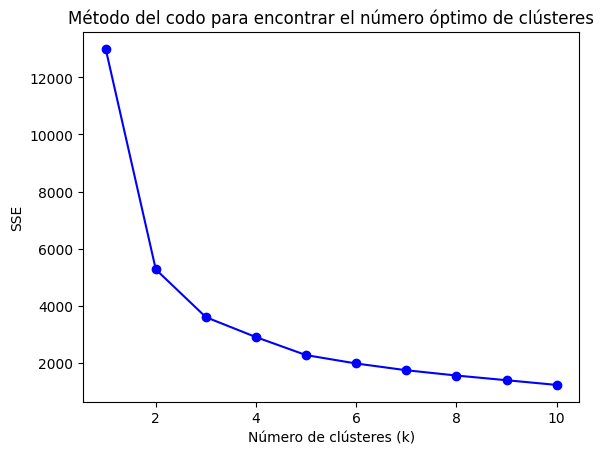

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

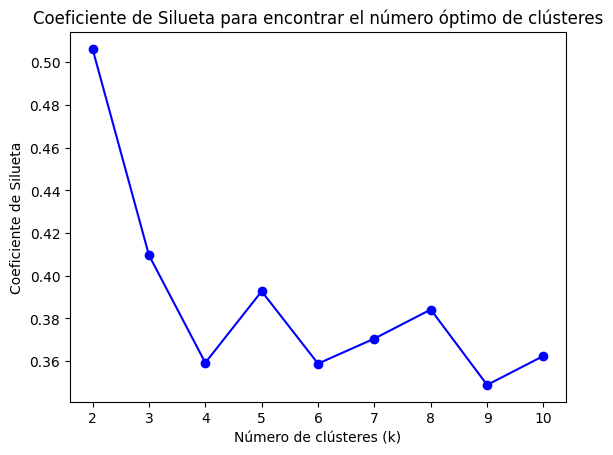

(3, 2)

In [ ]:
# Método del codo
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('SSE')
plt.title('Método del codo para encontrar el número óptimo de clústeres')
plt.show()

# Coeficiente de Silueta
silhouette_scores = []

k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Graficar el coeficiente de silueta
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para encontrar el número óptimo de clústeres')
plt.show()

# Seleccionar el mejor valor de k basándonos en el método del codo
optimal_k_elbow = 3

# Seleccionar el mejor valor de k basándonos en el coeficiente de silueta
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

optimal_k_elbow, optimal_k_silhouette


###Método del codo
El gráfico del método del codo nos muestra cómo varía la suma de los errores cuadráticos (SSE) en función del número de clústeres.

Se puede observar que la SSE disminuye rápidamente hasta k=3 y luego disminuye más lentamente a partir de ahí.
El "codo" del gráfico se encuentra en k=3, lo que indica que este puede ser el mejor valor de k según el método del codo.

###Coeficiente de silueta
El gráfico del coeficiente de silueta nos muestra cómo varía el coeficiente de silueta en función del número de clústeres (k).

El coeficiente de silueta es más alto para k=2 con un valor de aproximadamente 0.50.
Después de k=2, el coeficiente de silueta disminuye.

###Selección del mejor valor de k
Según el método del codo, el mejor valor de k es 3.
Según el coeficiente de silueta, el mejor valor de k es 2.


#Visualización de los Clústeres


#- Para K=2




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


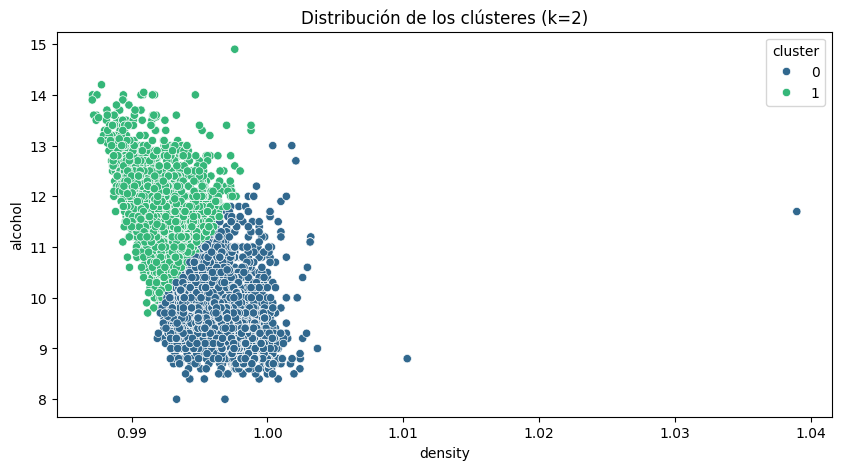

quality,3,4,5,6,7,8,9
cluster,,,,,,,
0,20,151,1782,1610,303,32,1
1,10,65,356,1226,776,161,4


In [ ]:
# Verificar los nombres de las columnas
wine_data.columns

# Asegurarse de que el clúster esté definido
if 'cluster' not in wine_data.columns:
    kmeans = KMeans(n_clusters=2, random_state=42)
    wine_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 5))
sns.scatterplot(x='density', y='alcohol', hue='cluster', data=wine_data, palette='viridis')
plt.title('Distribución de los clústeres (k=2)')
plt.show()


# Crear una tabla de frecuencias cruzadas
cross_tab_k2 = pd.crosstab(wine_data['cluster'], wine_data['quality'])
cross_tab_k2


##Similitud

El clúster 0 (representado en azul) agrupa principalmente vinos de menor calidad, con calificaciones de 5 y 6.
El clúster 1 (representado en verde) agrupa principalmente vinos de mayor calidad, con calificaciones de 6 y superiores.
Hay cierto solapamiento en la calidad 6, ya que ambos clústeres contienen vinos con esta calificación.

En el clúster 0, la mayoría de los vinos son de calidad 5 y 6, con 1.935 y 1.782 vinos respectivamente.
En el clúster 1, la mayoría de los vinos son de calidad 6 y superiores, con 1.226 y 776 vinos respectivamente.
Esto indica que hay cierta similitud entre los clústeres y los valores de quality.
##Diferencias
Los clústeres se diferencian principalmente en términos de contenido de alcohol y densidad:

El clúster 0 tiene vinos con menor contenido de alcohol, que oscila principalmente entre 8 y 11.
El clúster 1 tiene vinos con mayor contenido de alcohol, que oscila principalmente entre 11 y 14.

El clúster 0 tiene vinos con mayor densidad, que se sitúa principalmente entre 0.998 y 1.002.
El clúster 1 tiene vinos con menor densidad, que se sitúa principalmente entre 0.990 y 0.998.

#- Para K=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


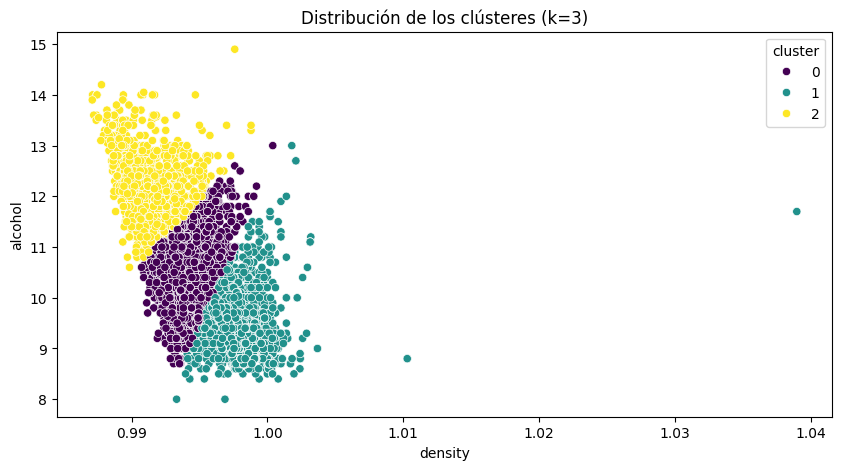

quality,3,4,5,6,7,8,9
cluster,,,,,,,
0,10,102,744,1147,329,38,0
1,16,83,1251,931,168,23,1
2,4,31,143,758,582,132,4


In [ ]:
# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['cluster'] = kmeans.fit_predict(X_scaled)

# Crear una tabla de frecuencias cruzadas
cross_tab_k3 = pd.crosstab(wine_data['cluster'], wine_data['quality'])

# Visualizar los clústeres
plt.figure(figsize=(10, 5))
sns.scatterplot(x='density', y='alcohol', hue='cluster', data=wine_data, palette='viridis')
plt.title('Distribución de los clústeres (k=3)')
plt.show()

cross_tab_k3


##Similitud

El clúster 0 (en morado) agrupa principalmente vinos de calidad 5 y 6, con 744 y 1147 vinos respectivamente.
El clúster 1 (en azul) agrupa principalmente vinos de calidad 6 y superiores, con 1251 vinos de calidad 6 y 931 de calidad 7.
El clúster 2 (en amarillo) agrupa principalmente vinos de calidad 7 y superiores, con 758 vinos de calidad 7 y 132 de calidad 8.
Hay cierta superposición en las calidades 6 y 7, lo que indica que estos valores de calidad son comunes entre los clústeres.

La tabla muestra que hay un número significativo de vinos de calidad 6 y 7 en todos los clústeres.
Esto indica que hay similitudes, pero también cierta diversidad en la distribución de los vinos entre los clústeres.

Hay una correlación entre los clústeres y la calidad (quality).
Los vinos de mayor calidad tienden a agruparse en el clúster 2, mientras que los vinos de menor calidad tienden a agruparse en el clúster 0.

##Diferencias
Los clústeres se diferencian principalmente en términos de contenido de alcohol y densidad:

El clúster 0 tiene vinos con menor contenido de alcohol, principalmente entre 9 y 12.
El clúster 1 tiene vinos con contenido de alcohol moderado, principalmente entre 9.5 y 12.5.
El clúster 2 tiene vinos con mayor contenido de alcohol, principalmente entre 10.5 y 14.

El clúster 0 tiene vinos con mayor densidad, principalmente entre 0.997 y 1.002.
El clúster 1 tiene vinos con densidad moderada, principalmente entre 0.994 y 1.001.
El clúster 2 tiene vinos con menor densidad, principalmente entre 0.990 y 1.000.

Los clústeres se diferencian principalmente en términos de contenido de alcohol y densidad.
Los vinos en el clúster 2 tienen mayor contenido de alcohol y menor densidad, mientras que los vinos en el clúster 0 tienen menor contenido de alcohol y mayor densidad.


# LAB 04 EJ 4

APARTADO 1

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

numero_de_clusters = 3

# con el número deseado de clústeres
kmeans = KMeans(n_clusters=numero_de_clusters, random_state=42)
kmeans.fit(wine_data)

# Obtenemos los centroides de cada clúster
centroides = kmeans.cluster_centers_

# Calculamos la distancia de cada ejemplo al centroide del clúster
distancias_a_centroides = kmeans.transform(wine_data)

# Seleccionamos los 10 ejemplos más cercanos al centroide de cada clúster
indices_ejemplos_representativos = np.argsort(distancias_a_centroides, axis=0)[:10]

# Imprimimos los índices de los ejemplos más representativos de cada clúster
for i in range(numero_de_clusters):
    print(f"Cluster {i}: Ejemplos más representativos {indices_ejemplos_representativos[:, i]}")


ejemplos_representativos = pd.DataFrame(indices_ejemplos_representativos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: Ejemplos más representativos [3780 4768 2397 6266 6263 3385 1964 4656 6437 2254]
Cluster 1: Ejemplos más representativos [1463    5 1312  686  931  933  847  237  687  500]
Cluster 2: Ejemplos más representativos [5928 5929 5926 5924 1884 4311 4314 3155 4268 2263]
      0     1     2
0  3780  1463  5928
1  4768     5  5929
2  2397  1312  5926
3  6266   686  5924
4  6263   931  1884
5  3385   933  4311
6  1964   847  4314
7  4656   237  3155
8  6437   687  4268
9  2254   500  2263


**¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster?**

Se ha hecho en base al metodo del centroide es una forma común de seleccionar ejemplos representativos dentro de cada clúster en el contexto de agrupamiento. Este método se basa en calcular el centroide de cada clúster y luego seleccionar los ejemplos que están más cerca de este centroide


En primer lugar, se calcula el centroide de cada clúster y se guardan en variable 'centroides'. El centroide es simplemente el punto medio de todos los ejemplos que pertenecen a ese clúster. Matemáticamente, el centroide se calcula tomando la media de las coordenadas de todos los puntos en el clúster. Por ejemplo, si tenemos un clúster con tres puntos en un espacio bidimensional, el centroide se calcula como el promedio de las coordenadas x e y de estos tres puntos.


Una vez que se calcula el centroide de cada clúster, se calcula la distancia de cada punto del clúster al centroide

 Después de calcular la distancia de cada punto al centroide, se seleccionan los ejemplos que están más cerca del centroide. Estos ejemplos se consideran los más representativos del clúster porque están más centrados y son menos sensibles a la variabilidad en los datos.

 En nuestro caso estamos utilizando los 10 elementos mas cercanos.

APARTADO 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Inicializamos y ajustamps el modelo de agrupamiento jerárquico aglomerativo
modelo_aglomerativo = AgglomerativeClustering(n_clusters=numero_de_clusters)
etiquetas = modelo_aglomerativo.fit_predict(ejemplos_representativos)

print("Etiquetas de los clústeres:")
print(etiquetas)

Etiquetas de los clústeres:
[0 0 0 0 1 2 2 1 1 2]


APARTADO 3

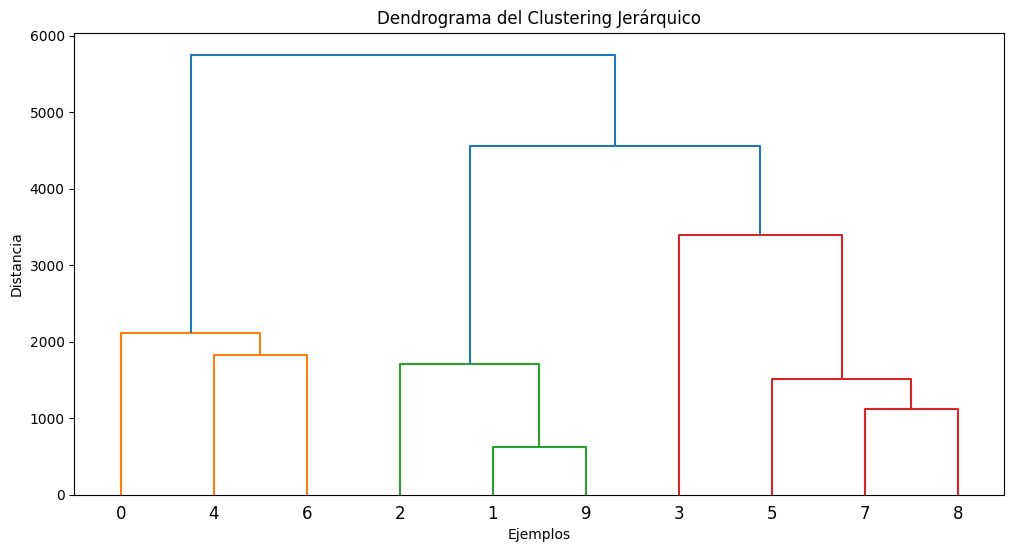

Etiquetas de los clústeres:
[0 0 0 0 1 2 2 1 1 2]


In [ ]:
from scipy.cluster import hierarchy

# Calculamos la matriz de enlace para el dendrograma
enlace = hierarchy.linkage(ejemplos_representativos, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrograma = hierarchy.dendrogram(matriz_enlace)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Ejemplos')
plt.ylabel('Distancia')
plt.show()


# Mostramos las etiquetas asignadas a cada ejemplo representativo
print("Etiquetas de los clústeres:")
print(etiquetas)

Vamos a utlizar el dendograma para visualizar cómo se agrupan los elementos o datos en diferentes clusters basándose en su similitud, cada rama representa un grupo y cada fusión de ramas (nodo) representa el punto en el que dos grupos se unen para formar un grupo más grande. La altura de los nodos (eje vertical que representa la distancia) indica la similitud entre los grupos; a mayor altura, menor similitud entre los grupos que se están fusionando.

Podemos observar diferentes grupos representados por diferentes colores. Por ejemplo, el grupo de color azul en la parte superior derecha del gráfico se fusiona a un nivel de distancia muy alto, lo que sugiere que estos subgrupos son bastante diferentes entre sí en comparación con los grupos que se fusionan a niveles más bajos de distancia.

Este dendograma se genera a partir de la "matriz de enlace" o "matriz de vinculación" (linkage matrix), es una matriz utilizada en métodos de agrupamiento jerárquico que resume la información sobre cómo se van formando los clusters durante el proceso de agrupamiento. La matriz de enlace típicamente tiene el siguiente formato:

Índice del primer cluster fusionado: Indica uno de los clusters que se fusiona.
Índice del segundo cluster fusionado: Indica el otro cluster que se fusiona.
Distancia entre los clusters: La métrica de distancia usada para determinar cuán "cercanos" o similares son los dos clusters.
Número de elementos originales en el nuevo cluster: Cuántos elementos contiene el nuevo cluster formado por la fusión.
Esta matriz proporciona una historia detallada de cómo cada par de clusters se fusiona desde los clusters individuales hasta que todos los datos se agrupan en un solo cluster. Utilizando esta matriz podemos construir el dendrograma y entender cómo se ha realizado el agrupamiento en cada paso.